In [402]:
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')
sns.set(rc = {'figure.figsize':(15, 7)})
sns.set_style('white')
pd.set_option('display.max_columns', 500)

# ML

In [552]:
lasso = Lasso()
ridge = Ridge()
enet = ElasticNet()

In [562]:
features = pd.read_csv('./data/dummified_with_PID.csv', index_col=0) # 2580 x 221
target = pd.read_csv('./data/Ames_Housing_Price_Data.csv')['SalePrice']

features2 = pd.read_csv('./data/features_dummified_376col.csv') # 2558 x 377
target2 = pd.read_csv('./data/target_376col.csv')['SalePrice']

In [563]:
features2 = features.drop(['BldgType_TwnhsE', 'SaleCondition_Partial', 
                           'Exterior1st_MetalSd', 'SaleType_New', 
                           'Exterior1st_CemntBd', 'Exterior2nd_CmentBd'], axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(features2.values, i)
                          for i in range(len(features2.columns))]


for idx, col in enumerate(features2.columns):
    print(f'{features2.columns[idx]}: {vif[idx]}')

LotShape: 1.6586585494858832
LandSlope: 2.0566699021508303
OverallQual: 4.677629316377815
OverallCond: 2.3163418042917336
ExterQual: 3.533445553920243
ExterCond: 1.4089582480164287
BsmtQual: 5.324855964536209
BsmtCond: 3.2812895462962275
BsmtExposure: 1.9220193454750407
HeatingQC: 2.018936592621281
BsmtFullBath: 2.3949844575625394
BsmtHalfBath: 1.3093835361628332
FullBath: 3.463393543434431
HalfBath: 2.7910313632043415
BedroomAbvGr: 2.770081886150622
KitchenAbvGr: 4.943992350905211
KitchenQual: 2.73649410052827
Functional: 1.36591897502865
FireplaceQu: 1.9263247962432823
GarageFinish: 2.7850467820008986
GarageQual: 9.86418303681234
PavedDrive: 1.8436246655443582
Fence: 1.28254708535571
GrLivArea: 11.591074699723427
LotFrontage: 1.5023824498482166
LotArea: 1.897855921736921
MasVnrArea: 2.8137150291371507
BsmtFinSF1: inf
BsmtFinSF2: inf
BsmtUnfSF: inf
TotalBsmtSF: inf
2ndFlrSF: 16.831932565706893
GarageArea: 3.183846625053297
WoodDeckSF: 1.3860459386503328
OpenPorchSF: 1.4453577342190442

In [ ]:
GridSearchCV(lasso, params, cv=10, return_train_score = True).fit(X_train_Y_train).best_params_

In [544]:
def grid_fit(model, params, cv):
    
    grid = GridSearchCV(model, params, cv=cv, return_train_score = True)
    ans = grid.fit(X_train, Y_train)
    print(grid.best_params_)
    model = ans.best_estimator_
    return model.fit(X_train, Y_train)

In [448]:
scaler = StandardScaler()
x_transformed = scaler.fit_transform(features)
y_transformed = scaler.fit_transform(pd.DataFrame(target))

In [449]:
# lets start by adding a random state and splitting the dataset

X_train, X_test, Y_train, Y_test = train_test_split(
    x_transformed, y_transformed[:, 0], test_size=0.3, random_state=1)

### Lasso

In [557]:
params = {'alpha': np.linspace(1e-5, 20, 20)}

model = grid_fit(lasso, params, cv=10)

{'alpha': 1e-05}


In [558]:
model.score(X_test, Y_test)

0.8948132156243676

In [561]:
model.get_params()

{'alpha': 1e-05,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [529]:
# lets take a look at the feature importances

sorted_importance = sorted(zip(features.columns, np.abs(model.coef_)), key=lambda t:t[1], reverse=True)

In [455]:
lasso_importance = sorted_importance[0:11]

In [412]:
df = features.reset_index().merge(target, left_index=True, right_index=True)
R2 = [model.score(X_test, Y_test)]
num_features = [len(features.columns)]

for idx, feature in enumerate(sorted_importance):
    
#     try:
    df.drop([sorted_importance[-(idx+1)][0]], axis=1, inplace=True)

    target = df['SalePrice']
    features = df.drop(['SalePrice'], axis=1)

    x_transformed = scaler.fit_transform(features)
    y_transformed = scaler.fit_transform(pd.DataFrame(target))

    X_train, X_test, Y_train, Y_test = train_test_split(
    x_transformed, y_transformed[:, 0], test_size=0.3, random_state=0)

    grid = GridSearchCV(model, params, cv=3, return_train_score = True)
    ans = grid.fit(X_train, Y_train)
    model = ans.best_estimator_

    R2.append(model.score(X_test, Y_test))
    num_features.append(features.shape[1])

    print(R2[idx], num_features[idx])
        
#     except:
#         pass


0.8989467915169369 212
0.8988504171822774 212
0.8988504171822774 211
0.8988419100802159 210
0.8988604363810138 209
0.898950438780897 208
0.8990937521113256 207
0.8990937521113256 206
0.8989467043183437 205
0.9008752480388275 204
0.900684530896599 203
0.9006765329174082 202
0.9006765329174083 201
0.9005191842493455 200
0.9007545419382532 199
0.9008888828107197 198
0.9009241132699026 197
0.9009173106971015 196
0.9009067822916228 195
0.9008363560390465 194
0.9008510211271675 193
0.9008511846175862 192
0.9008707988474114 191
0.9009246001372242 190
0.9009247671892071 189
0.9009765013177071 188
0.9010327745399324 187
0.9008612508498156 186
0.9009221932102097 185
0.9011800361179367 184
0.9012070935449582 183
0.9014092358813487 182
0.9014092358813487 181
0.9013149968321676 180
0.9012170587787683 179
0.9012338111092374 178
0.903104062875426 177
0.9030484471082876 176
0.9030551455017071 175
0.9031447703310667 174
0.9030978104310302 173
0.9030547356958657 172
0.9030706847253261 171
0.903079586592

<AxesSubplot:xlabel='features', ylabel='R2'>

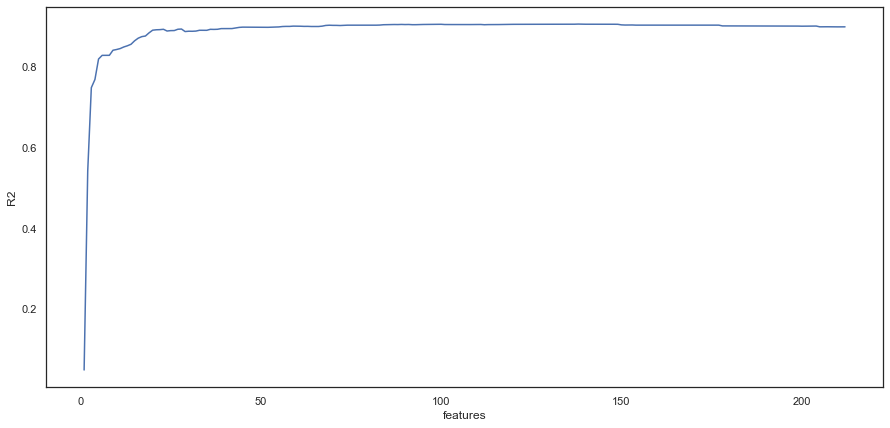

In [413]:
df2 = pd.DataFrame({'R2': R2, 'features': num_features})

sns.lineplot(df2['features'], df2['R2'])

### Ridge

PID  LotShape  LandSlope  OverallQual  OverallCond  ExterQual  \
0     909176150         4          3            6            6          2   
1     905476230         4          3            5            5          3   
2     911128020         4          3            5            9          3   
3     535377150         4          3            4            8          3   
4     534177230         4          3            8            6          3   
...         ...       ...        ...          ...          ...        ...   
2575  903205040         4          3            6            6          2   
2576  905402060         3          3            3            5          2   
2577  909275030         4          3            5            6          2   
2578  907192040         4          3            7            5          3   
2579  906223180         3          3            8            5          3   

      ExterCond  BsmtQual  BsmtCond  BsmtExposure  HeatingQC  BsmtFullBath  \
0             3         3         3             1          3             1   
1             3         4         3             2          3             1   
2             3         3         3             1          5             0   
3             4         2         3             1          4             0   
4             3         4         3             1          5             1   
...         ...       ...       ...           ...        ...           ...   
2575          3         3         3             1          2             0   
2576          3         0         0             0          5             0   
2577          3         3         3             1          3             0   
2578          3         4         3             1          5             1   
2579          3         4         3             1          5             0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         1         0             2             1   
1                0         2         0             2             1   
2                0         1         0             2             1   
3                0         1         0             2             1   
4                0         2         1             3             1   
...            ...       ...       ...           ...           ...   
2575             0         1         0             2             1   
2576             0         2         0             4             1   
2577             0         2         0             4             2   
2578             0         2         1             3             1   
2579             0         2         1             3             1   

      KitchenQual  Functional  FireplaceQu  GarageFinish  GarageQual  \
0               3           8            4             1           3   
1               4           8            0             3           3   
2               4           8            0             1           3   
3               3           8            0             1           3   
4               4           8            0             3           3   
...           ...         ...          ...           ...         ...   
2575            2           8            4             1           2   
2576            3           6            4             1           3   
2577            3           8            0             1           3   
2578            4           8            3             3           3   
2579            4           8            3             2           3   

      PavedDrive  Fence  GrLivArea  LotFrontage  LotArea  MasVnrArea  \
0              3      0        856            0     7890           0   
1              3      0       1049           42     4235         149   
2              1      0       1001           60     6060           0   
3              1      0       1039           80     8146           0   
4              3      0       1665           70     8400           0   
...         

In [546]:
features = pd.read_csv('./data/dummified_with_PID.csv').drop(['PID'], axis=1)
target = pd.read_csv('./data/Ames_Housing_Price_Data.csv')['SalePrice']
df = features.reset_index().merge(target, left_index=True, right_index=True)

scaler = StandardScaler()
x_transformed = scaler.fit_transform(features)
y_transformed = scaler.fit_transform(pd.DataFrame(target))

X_train, X_test, Y_train, Y_test = train_test_split(
    x_transformed, y_transformed[:, 0], test_size=0.3, random_state=1)

In [547]:
params = {'alpha': np.linspace(1e-5, 20, 20)}

model = grid_fit(ridge, params, cv=10)

{'alpha': 20.0}


In [548]:
model.score(X_test, Y_test)

0.8991132476519768

In [537]:
model.alpha

20.0

In [459]:
# lets take a look at the feature importances

sorted_importance = sorted(zip(features.columns, np.abs(model.coef_)), key=lambda t:t[1], reverse=True)

In [461]:
ridge_importance = sorted_importance[0:11]

In [433]:
df = features.reset_index().merge(target, left_index=True, right_index=True)
R2 = [model.score(X_test, Y_test)]
num_features = [len(features.columns)]

for idx, feature in enumerate(sorted_importance):
    
#     try:
    df.drop([sorted_importance[-(idx+1)][0]], axis=1, inplace=True)

    target = df['SalePrice']
    features = df.drop(['SalePrice'], axis=1)

    x_transformed = scaler.fit_transform(features)
    y_transformed = scaler.fit_transform(pd.DataFrame(target))

    X_train, X_test, Y_train, Y_test = train_test_split(
    x_transformed, y_transformed[:, 0], test_size=0.3, random_state=0)

    grid = GridSearchCV(ridge, params, cv=3, return_train_score = True)
    ans = grid.fit(X_train, Y_train)
    model = ans.best_estimator_

    R2.append(model.score(X_test, Y_test))
    num_features.append(features.shape[1])

    print(R2[idx], num_features[idx])
        
#     except:
#         pass


0.8991132476519768 212
0.8977370972307183 212
0.8977370972307183 211
0.8976288992738163 210
0.8975625259101407 209
0.8975625259101407 208
0.8974396790234956 207
0.89746919753966 206
0.8974691975396599 205
0.8976907497844487 204
0.8976283311405299 203
0.8973497546308576 202
0.8972865924051616 201
0.8974062360295162 200
0.8975276025580532 199
0.8975311097860628 198
0.8975404419092858 197
0.8975268927110016 196
0.8975470125776825 195
0.8978574987020307 194
0.9002872840550227 193
0.9017784718251693 192
0.9018856077976689 191
0.9017728064687622 190
0.9016072678899889 189
0.901636863357188 188
0.9018947615492574 187
0.9019519598952588 186
0.9019627819757545 185
0.9021006956343083 184
0.9019348565847664 183
0.9019781952548557 182
0.9019737646058761 181
0.9019722953562769 180
0.9019824258054128 179
0.9015898927956445 178
0.9014250195474426 177
0.9014453924864334 176
0.9014729897701647 175
0.9014947826446861 174
0.9016524819688291 173
0.9016337614659427 172
0.9016284987520911 171
0.901647328577

<AxesSubplot:xlabel='features', ylabel='R2'>

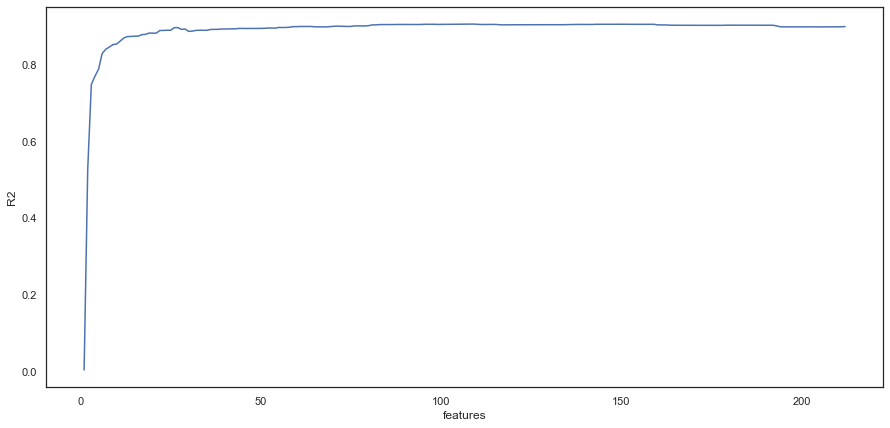

In [434]:
df2 = pd.DataFrame({'R2': R2, 'features': num_features})

sns.lineplot(df2['features'], df2['R2'])

### Elastic Net

In [549]:
features = pd.read_csv('./data/dummified_with_PID.csv').drop(['PID'], axis=1)
target = pd.read_csv('./data/Ames_Housing_Price_Data.csv')['SalePrice']
df = features.reset_index().merge(target, left_index=True, right_index=True)

scaler = StandardScaler()
x_transformed = scaler.fit_transform(features)
y_transformed = scaler.fit_transform(pd.DataFrame(target))

X_train, X_test, Y_train, Y_test = train_test_split(
    x_transformed, y_transformed[:, 0], test_size=0.3, random_state=1)

In [550]:
params = {'alpha': np.linspace(1e-5, 20, 20)}

model = grid_fit(enet, params, cv=10)

{'alpha': 1e-05}


In [551]:
model.score(X_test, Y_test)

0.8947643808507482

In [465]:
# lets take a look at the feature importances

sorted_importance = sorted(zip(features.columns, np.abs(model.coef_)), key=lambda t:t[1], reverse=True)

In [467]:
enet_importance = sorted_importance[0:11]

In [439]:
df = features.reset_index().merge(target, left_index=True, right_index=True)
R2 = [model.score(X_test, Y_test)]
num_features = [len(features.columns)]

for idx, feature in enumerate(sorted_importance):
    
#     try:
    df.drop([sorted_importance[-(idx+1)][0]], axis=1, inplace=True)

    target = df['SalePrice']
    features = df.drop(['SalePrice'], axis=1)

    x_transformed = scaler.fit_transform(features)
    y_transformed = scaler.fit_transform(pd.DataFrame(target))

    X_train, X_test, Y_train, Y_test = train_test_split(
    x_transformed, y_transformed[:, 0], test_size=0.3, random_state=0)

    grid = GridSearchCV(enet, params, cv=3, return_train_score = True)
    ans = grid.fit(X_train, Y_train)
    model = ans.best_estimator_

    R2.append(model.score(X_test, Y_test))
    num_features.append(features.shape[1])

    print(R2[idx], num_features[idx])
        
#     except:
#         pass


0.8947643808507482 212
0.896769586435653 212
0.896769586435653 211
0.896769586435653 210
0.896616908622013 209
0.8966028750868488 208
0.8966028750868487 207
0.8966036170466515 206
0.896594172606729 205
0.8966110083326106 204
0.8966105722090204 203
0.8966105722090204 202
0.8969476070629713 201
0.8969504068393379 200
0.8969400782514381 199
0.897049201133115 198
0.8971956973876765 197
0.8990435262419324 196
0.9012078265872621 195
0.9010933072287983 194
0.9010970477250787 193
0.901121327103474 192
0.9010970811077026 191
0.9008625116402322 190
0.9007996539346071 189
0.9008176198739981 188
0.9006202210148395 187
0.9005585847867852 186
0.9004567269224744 185
0.9004991859279556 184
0.9008656601495236 183
0.9008894485247221 182
0.9008374252436786 181
0.9008393198406959 180
0.9008352586457085 179
0.9010801307667231 178
0.9008918223328044 177
0.9008878262846206 176
0.900879785575036 175
0.9008677760122342 174
0.9008995739270035 173
0.9007643353608897 172
0.9007386356358542 171
0.900715537380397 1

<AxesSubplot:xlabel='features', ylabel='R2'>

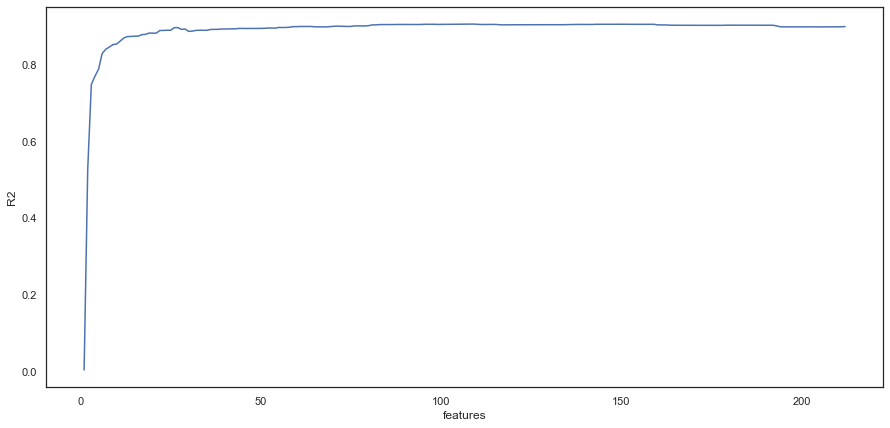

In [440]:
df3 = pd.DataFrame({'R2': R2, 'features': num_features})

sns.lineplot(df2['features'], df2['R2'])

In [441]:
df2.to_csv('./ridge_Rsq_v_feat.csv')
df3.to_csv('./enet_Rsq_v_feat.csv')

In [241]:
# # not the final model, but will use this in the meantime
# np.array(list(coefs.values())).dot(np.array(features[coefs.keys()].iloc[0])) 

feats = pd.Index(coefs.keys(), name='feats')
predict = pd.DataFrame({'coefs': coefs.values()}, index = feats)
predict.to_csv('./data/final_predictions.csv')

In [242]:
features[list(coefs.keys())].to_csv('./data/final_features.csv')

In [ ]:
params = {'alpha': np.logspace(1e-5, 20, 20),
          'normalize': [True, False]}

fit = grid_fit(lasso, params, cv=10)
find_coefs(fit)

In [ ]:
params = {'alpha': np.logspace(1e-5, 20, 20),
          'normalize': [True, False]}

fit = grid_fit(ridge, features, target, paramDict, cv=10)
find_coefs(fit, features)

In [ ]:
params = {'alpha': np.logspace(1e-5, 20, 20),
          'normalize': [True, False]}

fit = grid_fit(enet, features, target, paramDict, cv=10)
find_coefs(fit, features)

In [ ]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()

params = {
    "criterion": ["gini", "entropy"],
    "min_samples_leaf": range(1, 10),
    "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int)
}

fit = grid_fit(tree_model, features, target, grid_para_tree)

<AxesSubplot:xlabel='SalePrice'>

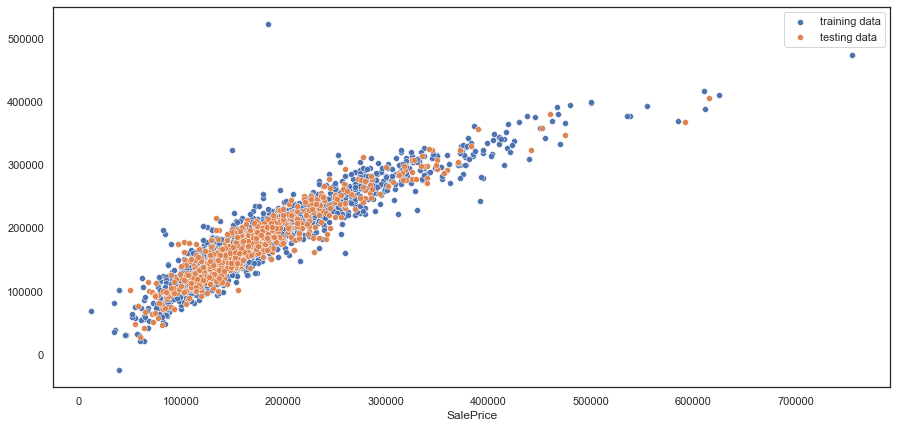

In [205]:
sns.scatterplot(Y_train, lasso.predict(X_train), label='training data')
sns.scatterplot(Y_test, lasso.predict(X_test), label='testing data')

In [566]:
lasso_df.iloc[0:7]

feature     lasso
0            GrLivArea  0.382718
1          OverallQual  0.157788
2           BsmtFinSF1  0.139222
3             HouseAge  0.130028
4  Exterior2nd_CmentBd  0.122925
5  Exterior1st_CemntBd  0.118943
6           MasVnrArea  0.098557

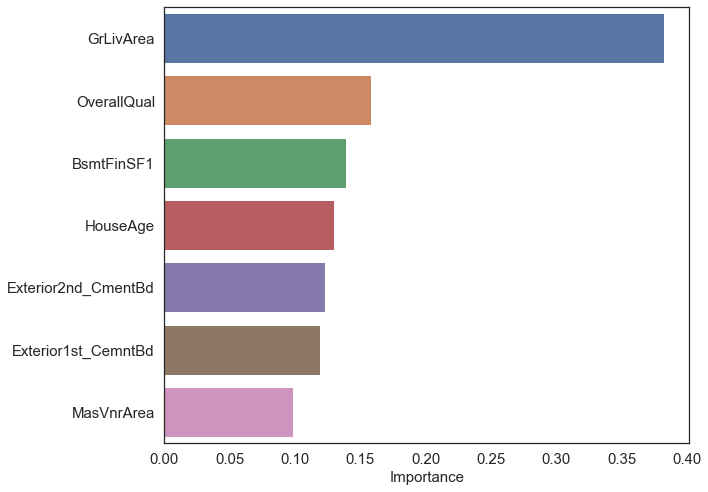

In [571]:
sns.set(rc = {'figure.figsize':(10, 7)})
sns.set_style('white')
title_fontsize = 15

data = pd.DataFrame(lasso_importance, columns=['feature', 'importance']).iloc[0:7]

fig = sns.barplot(data['importance'], data['feature'])

# plt.title('Top important Features for Lasso', fontsize= title_fontsize)
plt.xlabel('Importance', fontsize = title_fontsize)
plt.ylabel('', fontsize = title_fontsize)
plt.xticks(fontsize=title_fontsize)
plt.yticks(fontsize=title_fontsize)

plt.tight_layout()
plt.savefig(f'./visualizations/Feature Importance - lasso.png')
plt.show()

In [469]:
title_fontsize = 15

data = pd.DataFrame(lasso_importance, columns=['feature', 'importance'])



fig = sns.barplot(data['importance'], data['feature'], palette='Set2')

plt.title('Top important Features for ')
plt.xlabel('Importance', fontsize = title_fontsize)
plt.ylabel('Feature', fontsize = title_fontsize)
plt.xticks(fontsize=title_fontsize)
plt.yticks(fontsize=title_fontsize)

plt.tight_layout()
# plt.savefig(f'./visualizations/Model Performances vs Features - stacked.png')
plt.show()

[('GrLivArea', 0.38271848407240355),
 ('OverallQual', 0.15778820130562202),
 ('BsmtFinSF1', 0.1392215119713115),
 ('HouseAge', 0.13002817010632087),
 ('Exterior2nd_CmentBd', 0.12292492164987559),
 ('Exterior1st_CemntBd', 0.1189428465159864),
 ('MasVnrArea', 0.09855695791493113),
 ('Exterior1st_MetalSd', 0.09190279614189845),
 ('MSSubClass_120', 0.08932070645450273),
 ('MSSubClass_160', 0.08841625797457055),
 ('Neighborhood_NridgHt', 0.0874844981300966)]

In [470]:
ridge_importance

[('GrLivArea', 0.3466901379169889),
 ('OverallQual', 0.15805116616845025),
 ('HouseAge', 0.10844797149331194),
 ('MasVnrArea', 0.09816162139721736),
 ('BsmtFinSF1', 0.0961497985328972),
 ('TotalBsmtSF', 0.08164174416188949),
 ('OverallCond', 0.07752151265103092),
 ('MSSubClass_160', 0.06432566769429725),
 ('MSSubClass_120', 0.06211405344151236),
 ('GarageArea', 0.06081851966660397),
 ('KitchenQual', 0.06065966019376428)]

In [471]:
enet_importance

[('GrLivArea', 0.3826718441633905),
 ('OverallQual', 0.15775512371384662),
 ('BsmtFinSF1', 0.14324229737037913),
 ('HouseAge', 0.13009121026236284),
 ('Exterior2nd_CmentBd', 0.1230405123635381),
 ('Exterior1st_CemntBd', 0.11907903090873746),
 ('MasVnrArea', 0.09858422096176378),
 ('Exterior1st_MetalSd', 0.09278949993786266),
 ('MSSubClass_120', 0.08931040351372185),
 ('MSSubClass_160', 0.08838618407576972),
 ('Neighborhood_NridgHt', 0.0878455556995138)]

In [570]:
pd.DataFrame({'GrLivArea', 'OverallQual', '1stFlrSF', '2ndFlrSF', 'HouseAge', 'LotArea', })

feature  importance
0            GrLivArea    0.382718
1          OverallQual    0.157788
2           BsmtFinSF1    0.139222
3             HouseAge    0.130028
4  Exterior2nd_CmentBd    0.122925
5  Exterior1st_CemntBd    0.118943
6           MasVnrArea    0.098557

In [503]:
lasso_df = pd.DataFrame(lasso_importance, columns=['feature', 'lasso'])
ridge_df = pd.DataFrame(ridge_importance, columns=['feature', 'ridge'])
enet_df = pd.DataFrame(enet_importance, columns=['feature', 'enet'])

In [504]:
lasso_df

feature     lasso
0              GrLivArea  0.382718
1            OverallQual  0.157788
2             BsmtFinSF1  0.139222
3               HouseAge  0.130028
4    Exterior2nd_CmentBd  0.122925
5    Exterior1st_CemntBd  0.118943
6             MasVnrArea  0.098557
7    Exterior1st_MetalSd  0.091903
8         MSSubClass_120  0.089321
9         MSSubClass_160  0.088416
10  Neighborhood_NridgHt  0.087484

In [508]:
df = pd.merge(lasso_df, ridge_df, on='feature', how='outer').merge(enet_df, on='feature', how='outer')
df

feature     lasso     ridge      enet
0              GrLivArea  0.382718  0.346690  0.382672
1            OverallQual  0.157788  0.158051  0.157755
2             BsmtFinSF1  0.139222  0.096150  0.143242
3               HouseAge  0.130028  0.108448  0.130091
4    Exterior2nd_CmentBd  0.122925       NaN  0.123041
5    Exterior1st_CemntBd  0.118943       NaN  0.119079
6             MasVnrArea  0.098557  0.098162  0.098584
7    Exterior1st_MetalSd  0.091903       NaN  0.092789
8         MSSubClass_120  0.089321  0.062114  0.089310
9         MSSubClass_160  0.088416  0.064326  0.088386
10  Neighborhood_NridgHt  0.087484       NaN  0.087846
11           TotalBsmtSF       NaN  0.081642       NaN
12           OverallCond       NaN  0.077522       NaN
13            GarageArea       NaN  0.060819       NaN
14           KitchenQual       NaN  0.060660       NaN